In [128]:
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import torchvision
import numpy as np
import os
import matplotlib.pyplot as plt
from torch.optim import Adam
import torch

In [129]:
transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()])
trainset = torchvision.datasets.ImageFolder(root='devnagri_numerals/Train/', transform=transform)
train_dataloader = DataLoader(trainset,batch_size=100,shuffle=True)

In [130]:
testset = torchvision.datasets.ImageFolder(root='devnagri_numerals/Test/', transform=transform)
test_dataloader = DataLoader(trainset,batch_size=100,shuffle=True)

In [131]:
len(train_dataloader.dataset)

17000

In [132]:
len(test_dataloader.dataset)

17000

In [133]:
len(test_dataloader) * 16

2720

In [134]:
images,labels = next(iter(train_dataloader))
images = images.numpy()
images = np.transpose(images,(0,2,3,1))
labels = labels.numpy()

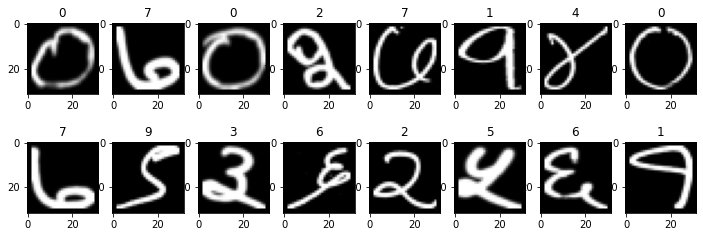

In [135]:
_, axs = plt.subplots(2, 8, figsize=(12,4))
axs = axs.flatten()
for lbl,img, ax in zip(labels[:16],images[:16], axs):
    ax.imshow(img)
    ax.title.set_text(lbl)
plt.show()

In [136]:
class HindiNet(nn.Module):
    def __init__(self):
        super(HindiNet, self).__init__()
        self.cnn_layer_1 = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,padding=1,stride=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.cnn_layer_2 = nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,padding=1,stride=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.fc1 = nn.Linear(256,10)
        
    def forward(self,x):
        out = self.cnn_layer_1(x)
        out = self.cnn_layer_2(out)
        out = out.reshape(out.size(0),-1)
        #print(out.shape)
        out = self.fc1(out)
        return out

In [137]:
model = HindiNet()
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = nn.CrossEntropyLoss()

In [138]:
model

HindiNet(
  (cnn_layer_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_layer_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=256, out_features=10, bias=True)
)

In [139]:
alpha_test_images,alpha_test_labels = next(iter(train_dataloader))

In [140]:
num_epochs = 5
losses = []
acc_list = []
val_losses = []
val_acc_list = []

In [141]:
for epoch in range(num_epochs):
    for i,(train_images,train_labels) in enumerate(train_dataloader):
        outputs = model(train_images)
        loss = criterion(outputs, train_labels)
        losses.append(loss.item())
        
        #Backpropagation and performing optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #accuracy tracking
        total_labels = train_labels.size(0)
        _,predicted = torch.max(outputs.data, 1)
        correct = (predicted == train_labels).sum().item()
        acc_list.append(correct/total_labels)
        
        if i%17 == 0:
            print("Epoch {} Step {} Train Loss {}  Train Accuracy {}".format(epoch,i,loss.item(),(correct/total_labels)))
        

Epoch 0 Step 0 Train Loss 2.2959799766540527  Train Accuracy 0.15
Epoch 0 Step 17 Train Loss 2.266878604888916  Train Accuracy 0.15
Epoch 0 Step 34 Train Loss 1.7229396104812622  Train Accuracy 0.46
Epoch 0 Step 51 Train Loss 1.2982591390609741  Train Accuracy 0.56
Epoch 0 Step 68 Train Loss 0.9391840100288391  Train Accuracy 0.69
Epoch 0 Step 85 Train Loss 1.0926419496536255  Train Accuracy 0.69
Epoch 0 Step 102 Train Loss 0.8155708312988281  Train Accuracy 0.74
Epoch 0 Step 119 Train Loss 0.9017056822776794  Train Accuracy 0.73
Epoch 0 Step 136 Train Loss 0.7059955596923828  Train Accuracy 0.77
Epoch 0 Step 153 Train Loss 0.5948619246482849  Train Accuracy 0.84
Epoch 1 Step 0 Train Loss 0.6638317108154297  Train Accuracy 0.76
Epoch 1 Step 17 Train Loss 0.7184808850288391  Train Accuracy 0.81
Epoch 1 Step 34 Train Loss 0.6715229749679565  Train Accuracy 0.74
Epoch 1 Step 51 Train Loss 0.5268857479095459  Train Accuracy 0.82
Epoch 1 Step 68 Train Loss 0.3984988033771515  Train Accuracy

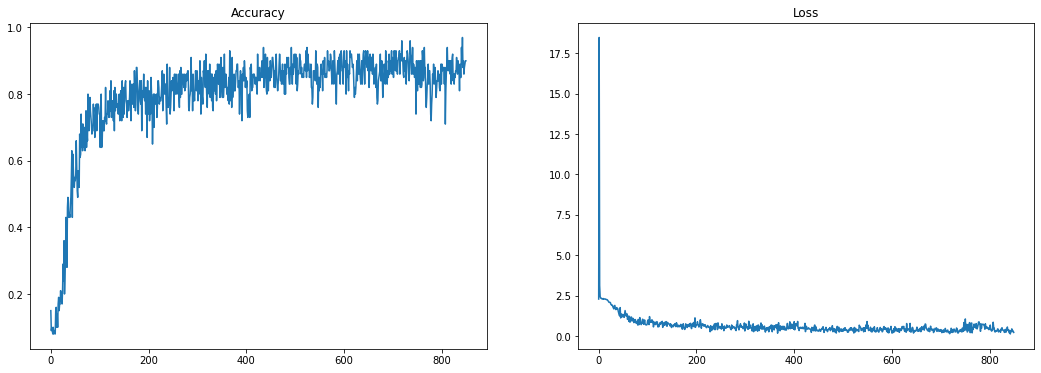

In [149]:
_,axs = plt.subplots(1,2,figsize=(18,6))
axs[0].plot(acc_list)
axs[0].title.set_text("Accuracy")
axs[1].plot(losses)
axs[1].title.set_text("Loss")